# Learning Images as Functions
I needed a task for developing basic neural networks. The task I selected is to take in a high-resolution images and have a neural network learn the mapping. This task is suitable because the performance is very quick to assess visually and because an image is typically much more complex than the typical functions learned by neural networks.

## Import the Image and Prepare the Dataset

In [ ]:
!git clone https://github.com/luticor/neural_network_images.git
import os
os.chdir('neural_network_images')

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!git pull

Batches per Epoch: 2025
x_tensor.shape torch.Size([2073600, 2])
y_tensor.shape torch.Size([2073600])


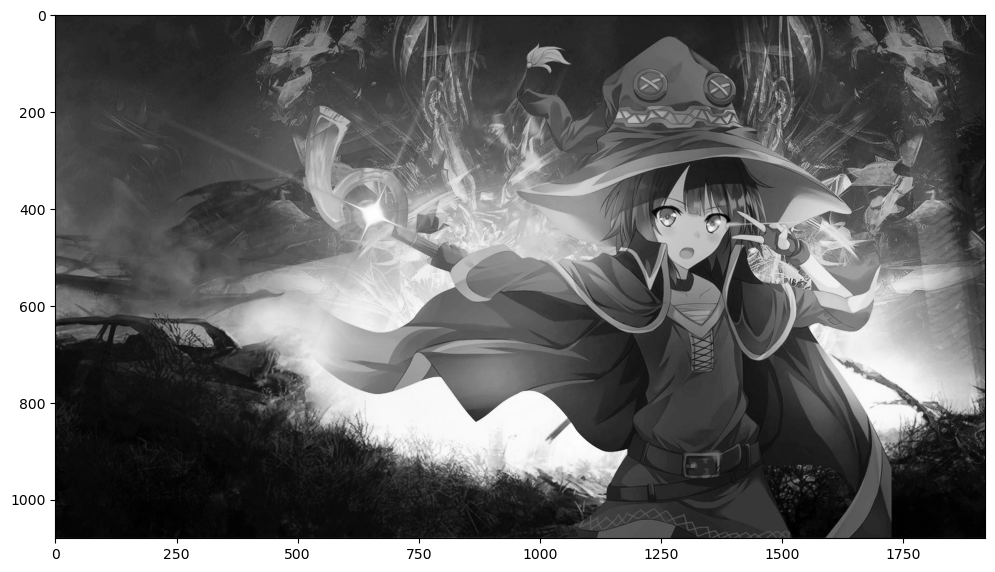

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
import model
import trainer
import custom_functions
from tqdm import tqdm
import datetime

batch_size = 256

# Get the current directory
current_dir = os.getcwd()

# Create a path to the image file that works on both Windows and Linux
img_path = os.path.join(current_dir, 'images', 'megumin_explosion.jpg')

# Open the image file
img = Image.open(img_path).convert('L')

# Process Image into dataset
df = custom_functions.image_to_dataframe(img)
dataloader = custom_functions.df_to_dataloader(df, batch_size=batch_size, shuffle=True, verbose=True)

#Plot Figure
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='Greys_r')
plt.show()

## Train the Neural Network

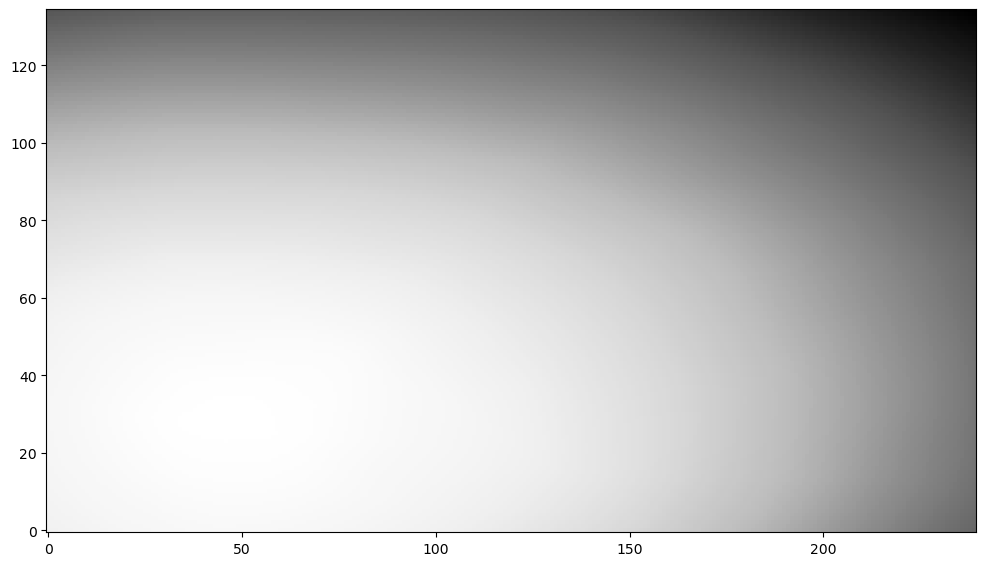

Epoch 0 of 20


100%|██████████| 2025/2025 [1:11:14<00:00,  2.11s/it]


Loss = 0.008931286633014679


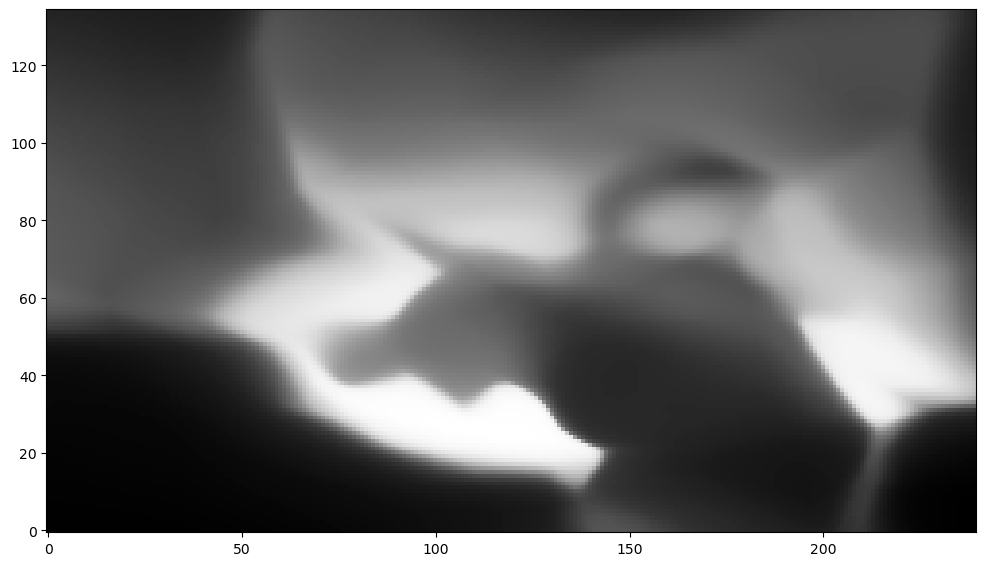

Epoch 1 of 20


100%|██████████| 2025/2025 [1:12:15<00:00,  2.14s/it]


Loss = 0.007707911543548107


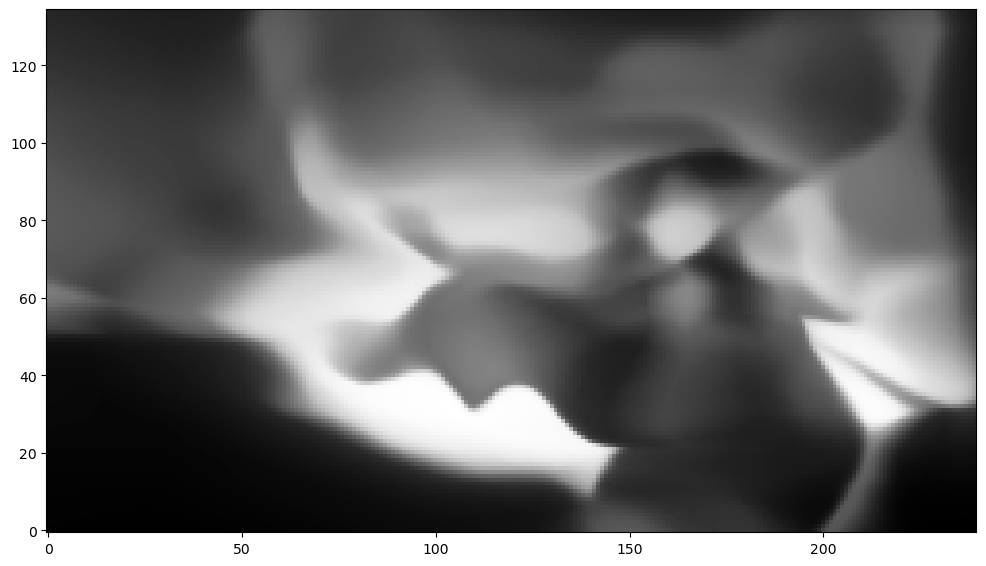

Epoch 2 of 20


100%|██████████| 2025/2025 [1:03:49<00:00,  1.89s/it]


Loss = 0.00705575430765748


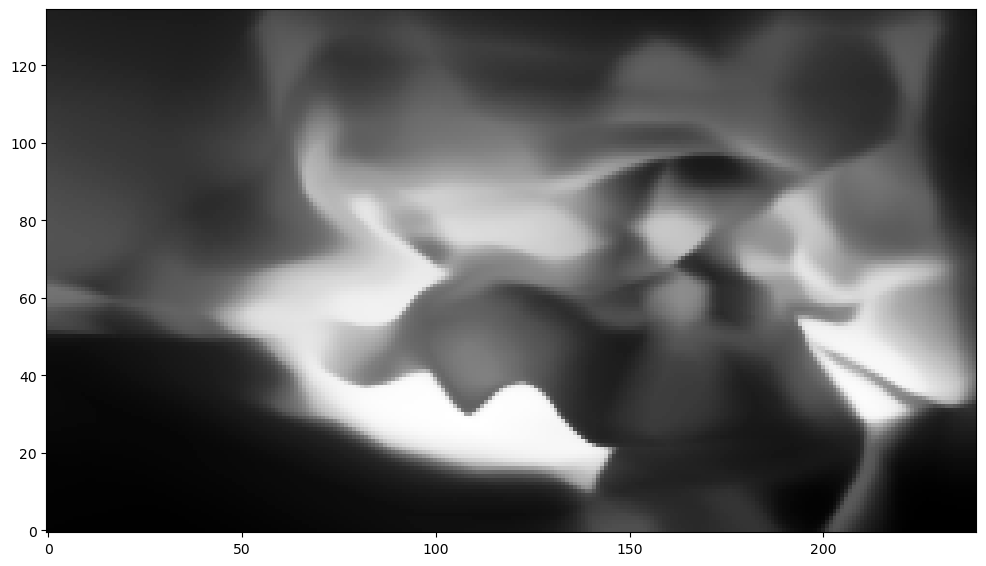

Epoch 3 of 20


100%|██████████| 2025/2025 [1:09:05<00:00,  2.05s/it]


Loss = 0.005264535546302795
Epoch 4 of 20


 34%|███▍      | 695/2025 [24:04<46:03,  2.08s/it]  


KeyboardInterrupt: 

In [13]:
net = model.ResNet_With_Sigmoid(nn_shape=(2,30,200,1), resnet_skip=2, activation=F.tanh)

def plot_func_wrapper(net):
    return custom_functions.plot_performance(net, scale=4, batch_size=batch_size)
plot_func = plot_func_wrapper

nn_trainer = trainer.NeuralNetworkTrainer(dataloader, net=net, n_epochs=30, lr=10**(-3.), plot_func=custom_functions.plot_performance)
nn_trainer.plot_output()
nn_trainer.train()
nn_trainer.plot_loss()
# nn_trainer.save_trainer()


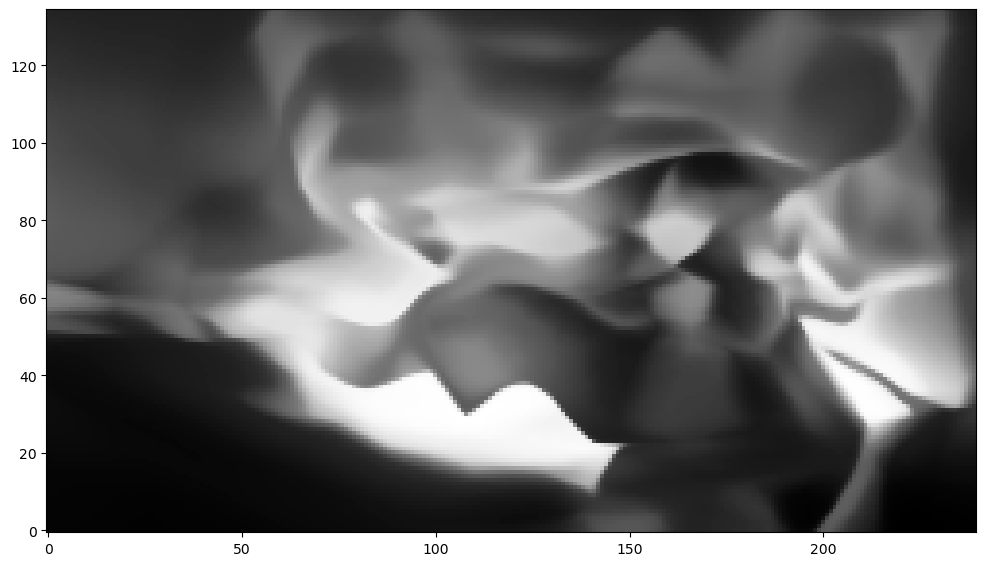

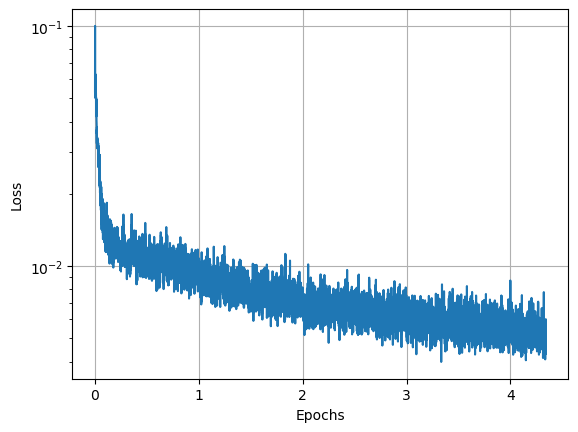

In [14]:
nn_trainer.plot_output()
nn_trainer.plot_loss()
#nn_trainer.save_trainer()

now = datetime.datetime.now()
date_string = now.strftime("%m%d_%H%M")
file_path = f"model_{date_string}.pickle"
nn_trainer.save_trainer('../drive/MyDrive/Colab Notebooks/images/'+file_path)

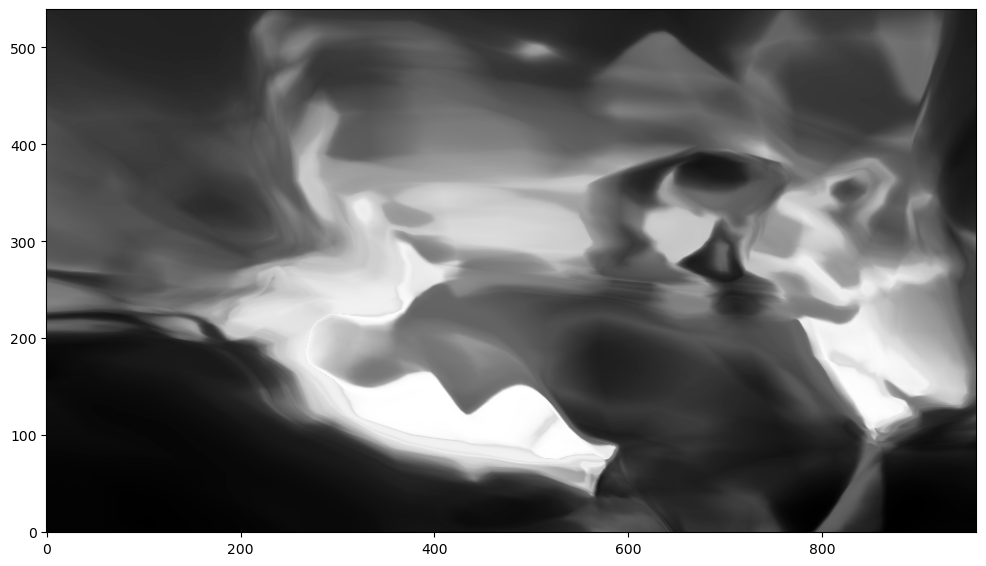

In [12]:
custom_functions.plot_performance(nn_trainer.net, scale=4, batch_size=batch_size)

In [6]:
nn_trainer = trainer.NeuralNetworkTrainer.load_trainer(file_path={filepath})

NameError: name 'filepath' is not defined

In [ ]:
import os
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\profe\\AppData\\Roaming',
        'ASL.LOG': 'Destination=file',
        'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\LOCAL\\crashpad_19720_YHOQWTOKWDVCVBFV',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'RICHARDS-2017-L',
        'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'diffusion_env2',
        'CONDA_EXE': 'C:\\ProgramData\\Anaconda3\\Scripts\\conda.exe',
        'CONDA_PREFIX': 'C:\\Users\\profe\\.conda\\envs\\diffusion_env2',
        'CONDA_PROMPT_MODIFIER': '(diffusion_env2) ',
        'CONDA_PYTHON_EXE': 'C:\\ProgramData\\Anaconda3\\python.exe',
        'CONDA_ROOT': 'C:\\ProgramData\\Anaconda3',
        'CONDA_SHLVL': '1',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
